# Model Validitation

- Metric for validation of data
- Stratefies for improving the model accuracy
- choosing the right metric and loss function

## Metric used

- accuracy
- confusion matrix
- precision
- recall
- F1 score
- AUC score

In [5]:
 from sklearn import datasets
iris = datasets.load_iris()

feature = iris.data

target = iris.target
    


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_left, y_train, y_left = train_test_split(feature, target, test_size=0.4, random_state=32)
  
print("Training Set shape: ", x_train.shape, y_train.shape, sep=' ')

x_test, x_val, y_test, y_val = train_test_split(x_left, y_left, test_size=0.5)
   
print("Testing Set Shape: ", x_test.shape, y_test.shape, sep=' ')
print("Validation Set shape: ", x_val.shape, y_val.shape, sep=' ')

Training Set shape:  (90, 4) (90,)
Testing Set Shape:  (30, 4) (30,)
Validation Set shape:  (30, 4) (30,)


In [12]:
from sklearn.svm import SVC
  
model =SVC()
model.fit(x_train, y_train)
  
y_pred = model.predict(x_test)
print(y_pred)

[0 1 0 1 0 0 1 2 2 0 1 0 2 0 1 2 2 1 1 1 0 0 1 2 0 0 0 1 0 1]


c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,f1_score, auc, confusion_matrix

accuracy_score(y_pred, y_test)

0.9666666666666667

In [14]:
cm = confusion_matrix(model.predict(x_test), y_test)

In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
   
path = os.path.join('Data','Iris.csv')
df = pd.read_csv(path)
 
df_num = df.select_dtypes(include=['float64'])
df_cat = df.select_dtypes(include=['object'])


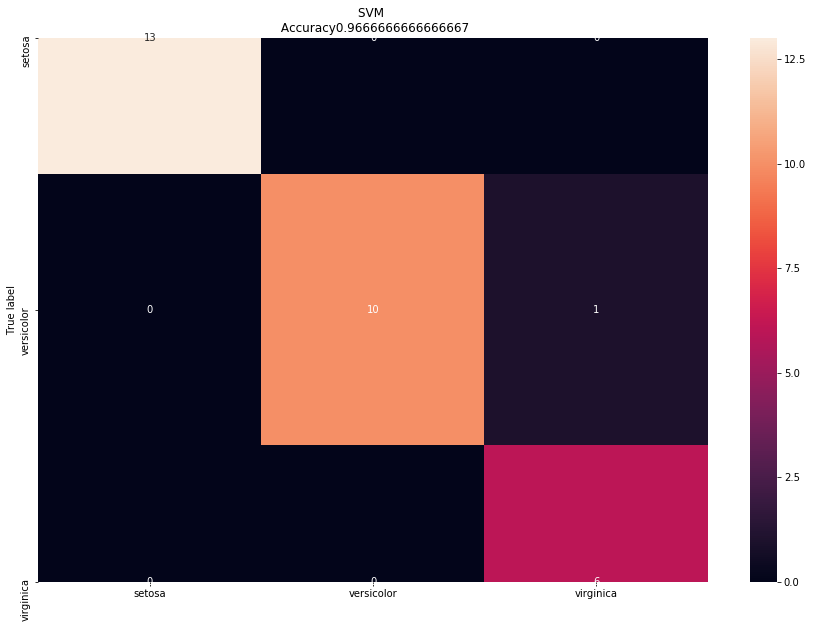

In [20]:
import seaborn as sns

cm_df = pd.DataFrame(cm, index = ['setosa', 'versicolor','virginica'], columns = ['setosa', 'versicolor','virginica'])

plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True)
plt.title('SVM \n Accuracy{}'.format(accuracy_score(y_pred, y_test)))
plt.ylabel('True label')
plt.show()

In both precision score and recall score default value of average is binary so it will not work for multiclass classification. We need to change the average value to ether None or micro to get the score

In [21]:
precision_score(y_pred=y_pred, y_true=y_test)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [24]:
precision_score(y_true=y_test, y_pred=y_pred, average='micro')

0.9666666666666667

In [25]:
recall_score(y_true=y_test, y_pred=y_pred, average='micro')

0.9666666666666667

In [27]:
cr = classification_report(y_pred, y_test)
print(cr.encode('utf-8').decode('unicode_escape'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### checknig and fitting various other classification algorithm

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

rf_clf = RandomForestClassifier()
et_clf = ExtraTreesClassifier()
knn_clf = KNeighborsClassifier()
svc_clf = SVC()
rg_clf = RidgeClassifier()
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
adab_clf = AdaBoostClassifier()
gnb_clf = GaussianNB()
mnb_clf = MultinomialNB()
bnb_clf = BernoulliNB()

In [36]:
classifiers = [('RandomForestClassifier', rf_clf),\
               ('ExtraTreesClassifier', et_clf),\
               ('KNeighborsClassifier',knn_clf),\
               (' SVC', svc_clf),\
               ('RidgeClassifier',rg_clf ),\
               ('LogisticRegression',lr_clf),\
               ('DecisionTreeClassifier',dt_clf ),\
               ('AdaBoostClassifier',adab_clf),\
               ('GaussianNB',gnb_clf),\
               ('MultinomialNB',mnb_clf),\
               ('BernoulliNB',bnb_clf)]


model_summary = pd.DataFrame(columns=['clf_name','accuracy','recision','recall'])
model_precision = []
model_accuracy = []
model_recall = []
model_name = []

for i in classifiers:
    i[1].fit(x_train, y_train)
    model_name.append(i[0])
    model_accuracy.append(accuracy_score(i[1].predict(x_test),y_test))
    model_recall.append(recall_score(i[1].predict(x_test), y_test, average='micro'))
    model_precision.append(precision_score(i[1].predict(x_test), y_test, average='micro'))
    
    
model_summary['clf_name'] = model_name
model_summary['accuracy'] = model_accuracy
model_summary['recall'] = model_recall
model_summary['precision'] = model_precision

model_summary

c:\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\python37\lib\site-packages\sklearn\line

clf_name  accuracy recision    recall  precision
0   RandomForestClassifier  0.933333      NaN  0.933333   0.933333
1     ExtraTreesClassifier  0.900000      NaN  0.900000   0.900000
2     KNeighborsClassifier  0.933333      NaN  0.933333   0.933333
3                      SVC  0.966667      NaN  0.966667   0.966667
4          RidgeClassifier  0.766667      NaN  0.766667   0.766667
5       LogisticRegression  0.933333      NaN  0.933333   0.933333
6   DecisionTreeClassifier  0.966667      NaN  0.966667   0.966667
7       AdaBoostClassifier  0.933333      NaN  0.933333   0.933333
8               GaussianNB  0.966667      NaN  0.966667   0.966667
9            MultinomialNB  0.866667      NaN  0.866667   0.866667
10             BernoulliNB  0.233333      NaN  0.233333   0.233333

## Miscellaneous Methods:

- Using the validation data to find the correct probability
- Cross validation technique

In [37]:
print("The validation data set details are:\n Feature Shape: {}\nLabel Share: {}".format(x_val.shape, y_val.shape))

The validation data set details are:
 Feature Shape: (30, 4)
Label Share: (30,)


In [38]:
print(accuracy_score(model.predict(x_val), y_val))

1.0


The validation only gives the correct idea about how you model is going. This dat is hidden from the model and will return the true accuracy.

## Cross Validation

This method is used when:

We want to do a sequence of fits where each subset of the data is used as a training set and as a validation set.


In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model, X=feature, y=target, cv=5, n_jobs=-1)
acc_mean = accuracies.mean()
acc_std = accuracies.std()

print("Avg. Accuracy: ", round(acc_mean*100), "% ", "Std: ", round(acc_std*100,2), "%")

Avg. Accuracy:  98.0 %  Std:  1.63 %


## Model Tuning 


Following are the methods to tune the model:

- GridSearchCV
- RandomSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [1,10,100,1000], 'kernel':['linear']},
            {'C' : [1,10,100,1000], 'kernel':['poly'],
            'gamma':[0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9 ], 'degree':[1,2,3,4,5,6,7,8,9]},
             {'C': [1,10,100,1000], 'kernel': ['rbf'], 'gamma':[0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9]},
             {'C': [1,10,100,1000], 'kernel': ['sigmoid'], 'gamma':[0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9]}]
    
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv=5, n_jobs=-1)

grid_search = grid_search.fit(x_train, y_train)
best_accuracy1 = grid_search.best_score_
best_parameters1 = grid_search.best_params_

print(best_accuracy1)
print(best_parameters1)

0.9666666666666667
{'C': 1, 'degree': 1, 'gamma': 0.2, 'kernel': 'poly'}


c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
from sklearn.model_selection import GridSearchCV
paramenters2 = [{'C':[0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9,1], "kernel":['linear']}]
grid_search = GridSearchCV(estimator = model, param_grid=paramenters2, scoring='accuracy', cv=5, n_jobs=-1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy2 = grid_search.best_score_
best_parameters2 = grid_search.best_params_

print(best_accuracy2)
print(best_parameters2)

0.9666666666666667
{'C': 0.2, 'kernel': 'linear'}


c:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
